Plots: GalaxyPlotter
====================

This example illustrates how to plot a `Galaxy` using a `GalaxyPlotter`.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets create a `Galaxy` with multiple `LightProfile`'s and a `MassProfile`.

In [2]:
bulge = al.lp.EllSersic(
    centre=(0.0, -0.05),
    elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.9, angle=45.0),
    intensity=4.0,
    effective_radius=0.6,
    sersic_index=3.0,
)

disk = al.lp.EllExponential(
    centre=(0.0, 0.05),
    elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.7, angle=30.0),
    intensity=2.0,
    effective_radius=1.6,
)

mass = al.mp.EllIsothermal(
    centre=(0.0, 0.0),
    einstein_radius=0.8,
    elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.7, angle=45.0),
)

galaxy = al.Galaxy(redshift=0.5, bulge=bulge, disk=disk, mass=mass)

We also need the 2D grid the `Galaxy`'s `Profile`'s are evaluated on.

In [3]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

We now pass the galaxy and grid to a `GalaxyPlotter` and call various `figure_*` methods to 
plot different attributes.

In [4]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy, grid=grid)
# galaxy_plotter.figures_2d(
#     image=True,
#     convergence=True,
#     potential=False,
#     deflections_y=True,
#     deflections_x=True,
#     magnification=True,
# )
# galaxy_plotter.figures_1d(image=True, convergence=True, potential=True)

We can plot decomposed 1D profiles, which display a property of the galaxy in addition to those of its individual light 
and mass profiles. 

For the 1D plot of each profile, the 1D grid of (x) coordinates is centred on the profile and aligned with the 
major-axis. This means that if the galaxy consists of multiple profiles with different centres or angles the 1D plots 
are defined in a common way and appear aligned on the figure.

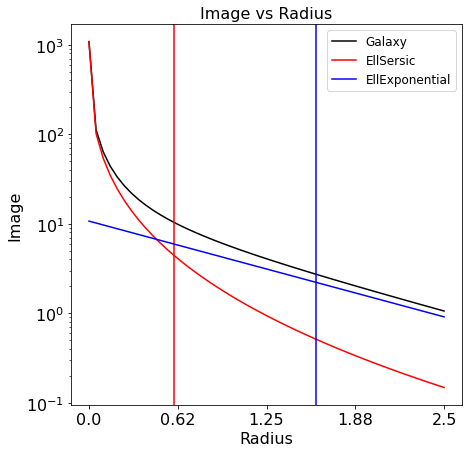

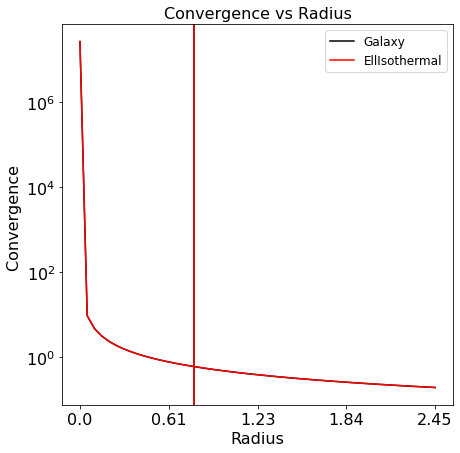

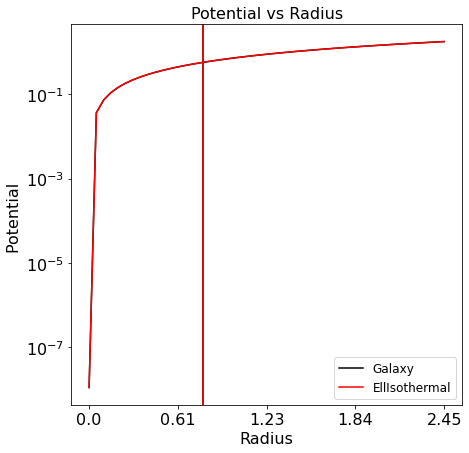

In [5]:
galaxy_plotter.figures_1d_decomposed(image=True, convergence=True, potential=True)

The `GalaxyPlotter` also has subplot method that plot each individual `Profile` in 2D as well as a 1D plot showing all
`Profiles` together.

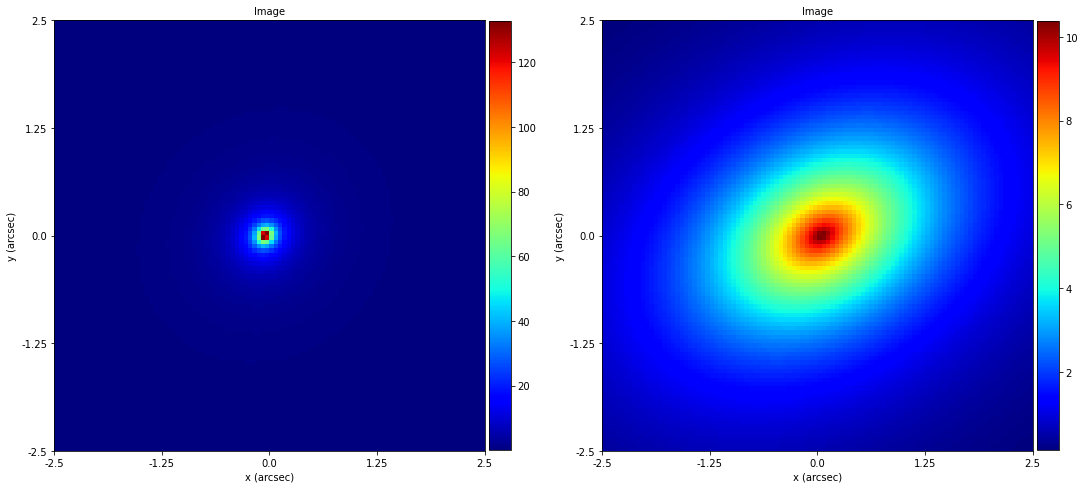

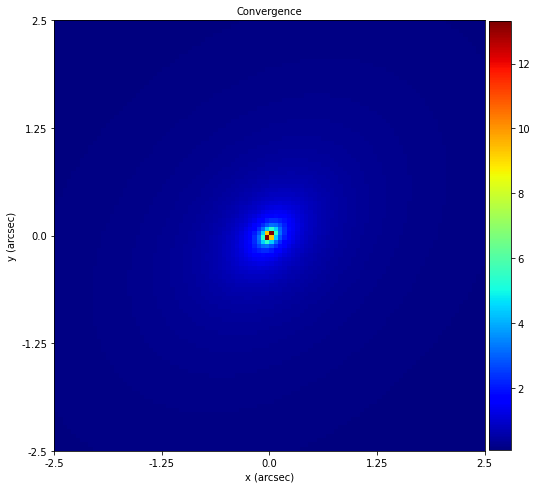

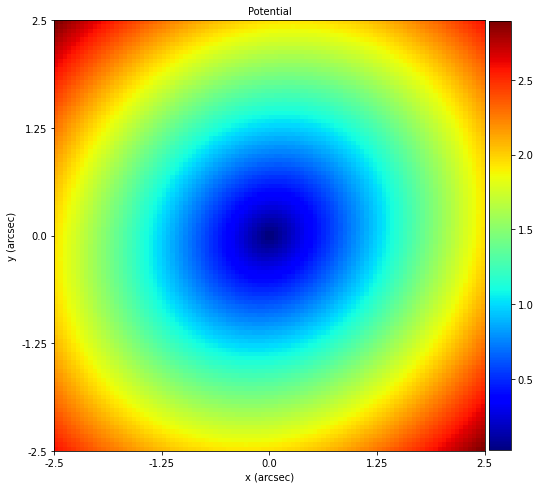

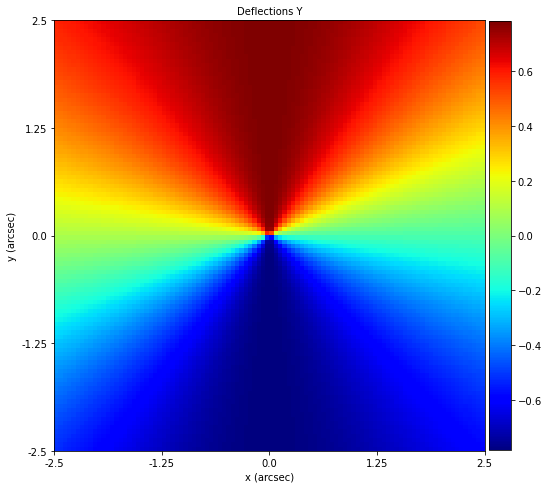

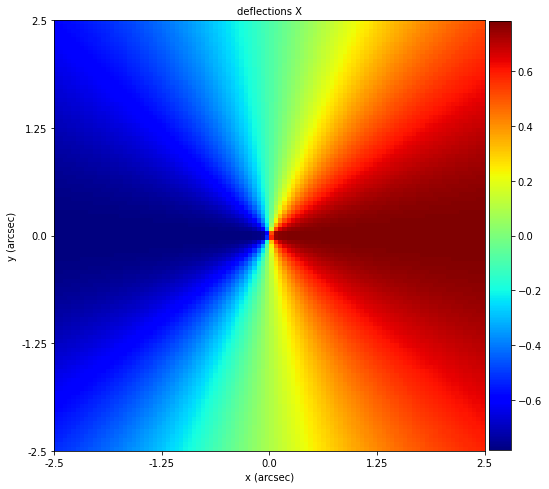

In [6]:
galaxy_plotter.subplot_of_light_profiles(image=True)
galaxy_plotter.subplot_of_mass_profiles(
    convergence=True, potential=True, deflections_y=True, deflections_x=True
)

A `Galaxy` and its `Grid2D` contains the following attributes which can be plotted automatically via 
the `Include2D` object.

(By default, a `Grid2D` does not contain a `Mask2D`, we therefore manually created a `Grid2D` with a mask to illustrate
plotting its mask and border below).

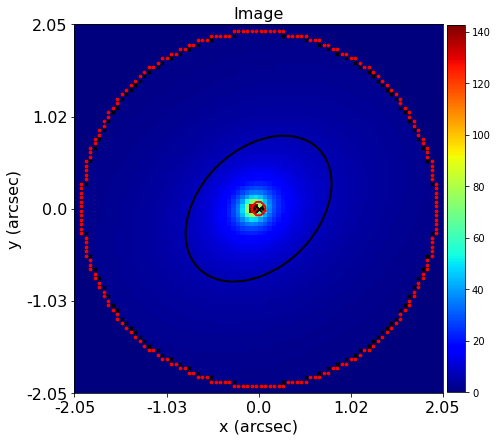

In [7]:
mask = al.Mask2D.circular(
    shape_native=grid.shape_native, pixel_scales=grid.pixel_scales, radius=2.0
)
masked_grid = al.Grid2D.from_mask(mask=mask)

include_2d = aplt.Include2D(
    origin=True,
    mask=True,
    border=True,
    light_profile_centres=True,
    mass_profile_centres=True,
    critical_curves=True,
)
galaxy_plotter = aplt.GalaxyPlotter(
    galaxy=galaxy, grid=masked_grid, include_2d=include_2d
)
galaxy_plotter.figures_2d(image=True)

Finish.